# Let's reuse the content

This notebook shows how to reuse the text extracted from the [UK Web Archive](https://bl.iro.bl.uk/collections/5379d014-1774-46e1-a96a-7089e7c814a3). In particular, this notebook is based on the dataset [Scottish Churches](https://bl.iro.bl.uk/concern/datasets/d99a9777-0c28-4a2c-b0f4-c7a43f836b48
) to compute the frequency distribution of words.

In [1]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import string
import pandas as pd

[nltk_data] Downloading package punkt to /home/gustavo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/gustavo/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gustavo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### We open the CSV file using the URL of the dataset

In [3]:
# assigning url to a variable
url="https://bl.iro.bl.uk/downloads/4dc4ea7b-8506-4d25-8efd-534a104a8834"
 
# passing parameter to the function
data =pd.read_csv(url)
print(data)

      Higher Level Collection  Collection ID Collection or Subsection Name  \
0                         NaN           1230             Scottish Churches   
1                         NaN           1230             Scottish Churches   
2                         NaN           1230             Scottish Churches   
3                         NaN           1230             Scottish Churches   
4                         NaN           1230             Scottish Churches   
...                       ...            ...                           ...   
2861                      NaN           1230             Scottish Churches   
2862                      NaN           1230             Scottish Churches   
2863                      NaN           1230             Scottish Churches   
2864                      NaN           1230             Scottish Churches   
2865                      NaN           1230             Scottish Churches   

     Main Collection or Subsection             Date Created  Re

In [5]:
# Get column names
column_names = data.columns
print(column_names)

Index(['Higher Level Collection', 'Collection ID',
       'Collection or Subsection Name', 'Main Collection or Subsection',
       'Date Created', 'Record ID', 'Primary Seed', 'Title of Target',
       'Description', 'Language', 'Licence Status', 'LD Criteria',
       'Institution ID', 'Updated', 'Depth', 'Scope', 'Robots.txt',
       'Crawl Frequency', 'Crawl Start Date', 'Crawl End Date'],
      dtype='object')


#### Now we concatenate the text provided by the column Description

In [8]:
description = data["Description"]
text = description.str.cat(sep=' ')
#print(text)

### We create split the text into tokens

In [9]:
text_tokens = word_tokenize(text)

### We can improve the stopwords list with our own words

In [10]:
stop_words = stopwords.words('english')
print(len(stop_words))
stop_words = stopwords.words('english') + list(string.punctuation)
print(len(stop_words))
stop_words.extend(['...', ',,', '-', '–','“','”','’'])
print(len(stop_words))

198
230
237


In [11]:
filtered_words = [word.lower() for word in text_tokens if word.lower() not in stop_words]
#print(filtered_words)

### We can compute the frequency distribution

A frequency distribution records the number of times each outcome of an experiment has occurred. For example, a frequency distribution could be used to record the frequency of each word type in a document.


In [12]:
fdist = FreqDist(filtered_words)
print(fdist)

<FreqDist with 2374 samples and 25187 outcomes>


In [13]:
fdist.most_common(10)

[('church', 3204),
 ('site', 1967),
 ('located', 1440),
 ('scottish', 1128),
 ('christian', 1123),
 ('scotland', 1018),
 ('parish', 986),
 ('denomination', 596),
 ('congregation', 401),
 ('page', 351)]

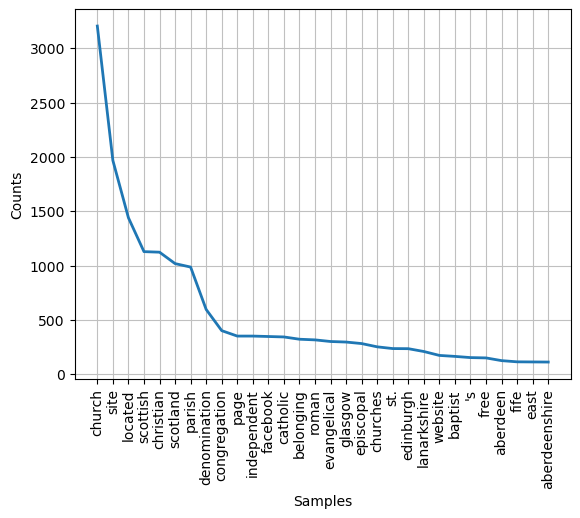

In [14]:
# Frequency Distribution Plot
fdist.plot(30)
plt.show()